In [28]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

In [29]:
uploaded = files.upload()

In [30]:
data = pd.read_csv('heart.csv')

In [31]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [32]:
age_groups = pd.cut(data['Age'], bins= [0,30,40,50,60,70,80], labels=["<30","30-40","40-50","50-60","60-70","70-80"])
heart_disease_couts = data[data['HeartDisease']==1].groupby([age_groups,"Sex"]).size().unstack()
most_common_chest_pain = data.groupby(age_groups)["ChestPainType"].apply(lambda x: x.mode().iloc[0])
average_hr_by_age = data.groupby(age_groups)["MaxHR"].mean()

In [33]:
print("Heart disease cases and most common chest pain type by age group and gender")
print(pd.concat([heart_disease_couts, most_common_chest_pain, average_hr_by_age], axis=1))

Heart disease cases and most common chest pain type by age group and gender
        F    M ChestPainType       MaxHR
Age                                     
<30     0    0           ATA  177.400000
30-40   4   28           ASY  155.056818
40-50   7   86           ASY  144.757848
50-60  20  202           ASY  134.291339
60-70  18  127           ASY  125.609137
70-80   1   15           ASY  119.500000


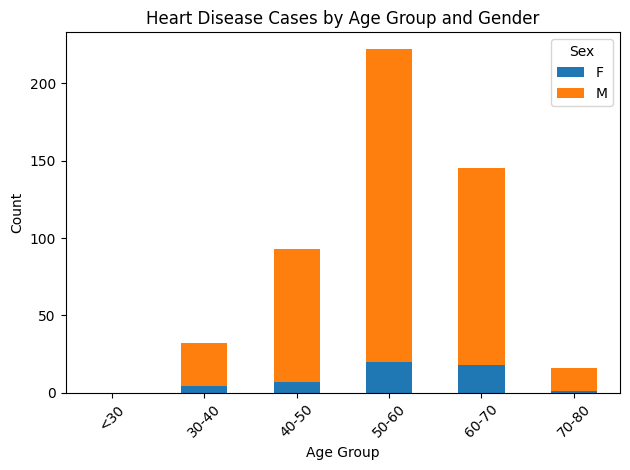

In [36]:
heart_disease_couts.plot(kind="bar", stacked=True)
plt.title("Heart Disease Cases by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.tight_layout()
plt.show()